
# Project: Investigate Tmdb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Here we are investigating the TMDb dataset(The Movie Database).First, we will clean the data and after that we will ask questions in the next section.

Let's import the libraries first. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

We are loading the data thorugh Pandas 'read_csv'

In [2]:
df = pd.read_csv(r'C:\Users\Dragon\Downloads\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check for the number of rows & columns

In [3]:
df.shape

(10866, 21)

Now, we will check for the statistics of the data by using describe function.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's check the data types of variuos columns. Also checking for the number of missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see that the homepage column has large number of missing values.So, instead of filling, it's better to drop this column as it contains less data.
Release date is marked as object, we need to convert it to datetime.
Genre , production_companies have very less number of missing values, so, we will drop these rows having missing values.
Cast column also has very few missing values, instead of dropping the rows , we will fill unknown to these missing values.

Let's check for unique values in each column.

In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning 

We will be performing the following data cleaning tasks:-

 - Remove the columns which are not necessary for the investigation.
 - Drop duplicate rows.
 - Drop the rows having budget adjusted is zero.
 - Drop the rows hvaing missing values in genres & production_comapnies columns.
 - Converting release_date data type to datetime.
 - Filling missing values of the cast column with 'Unknown'.
 
Let's start one by one.

Remove the columns which are not necessary for the investigation.

In [8]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'director','tagline', 'overview'], axis=1, inplace=True)

Drop duplicate rows.

In [9]:
df.drop_duplicates(inplace=True)

Drop the rows having budget adjusted is zero.

In [10]:
df.drop(df[(df.budget_adj == 0)].index, inplace=True)

Drop the rows hvaing missing values in genres & production_comapnies columns.

In [11]:
df.dropna(inplace=True, subset=['genres', 'production_companies'])

Converting release_date data type to datetime.

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

Filling missing values of the cast column with 'Unknown'.

In [13]:
df['cast'] = df['cast'].fillna('Unknown')

Let's again check for the data types as well as for the missing values.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 10865
Data columns (total 13 columns):
id                      5032 non-null int64
popularity              5032 non-null float64
original_title          5032 non-null object
cast                    5032 non-null object
runtime                 5032 non-null int64
genres                  5032 non-null object
production_companies    5032 non-null object
release_date            5032 non-null datetime64[ns]
vote_count              5032 non-null int64
vote_average            5032 non-null float64
release_year            5032 non-null int64
budget_adj              5032 non-null float64
revenue_adj             5032 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 550.4+ KB


Great now we are ready for asking the questions and now we will start our analysis.

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 (What genres are the most popular?)

We have checked above that in some rows genres are seperated by '|' , let's create a genre list from the genre column.

In [15]:
genre_list = df['genres'].str.split('|')

genres = []

for i in genre_list:
    genres.extend(i)

Now we will create a histogram of the top genres.

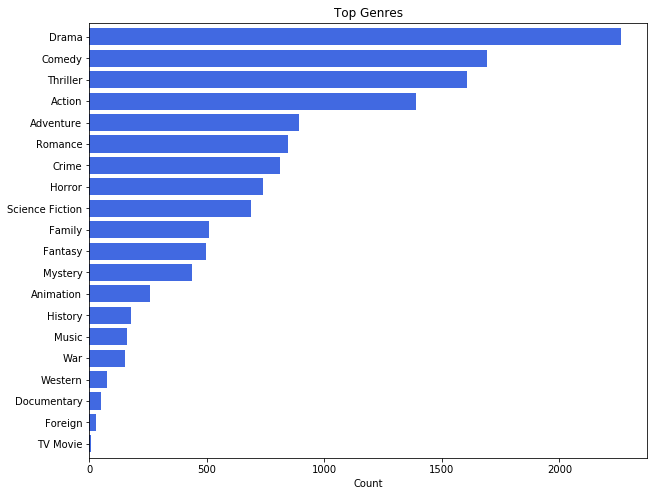

In [43]:
pd.Series(genres).value_counts().sort_values(ascending=True).plot.barh(width=0.8,figsize=(10,8),color='royalblue')
plt.title('Top Genres')
plt.xlabel('Count')
plt.show()

Above graph clearly shows that the **Drama** is the most popular genre.

### Question 2  (Ratings for the Low & High Budget Movies)

Let's first extract the Low & High Budget movies (150 each) with ratings from sorting the movies by budget

In [82]:
high_budget = df.sort_values(by=['budget_adj'], ascending = False).head(150)
high_budget_ratings = high_budget.groupby(['original_title'])['vote_average'].mean()

In [83]:
high_budget_ratings.head()

original_title
2012                 5.6
47 Ronin             5.8
A Bug's Life         6.6
A Christmas Carol    6.6
Alexander            5.6
Name: vote_average, dtype: float64

In [84]:
low_budget = df.sort_values(by=['budget_adj'], ascending = True).head(150)
low_budget_ratings = low_budget.groupby(['original_title'])['vote_average'].mean()

Let's compare the results with histogram

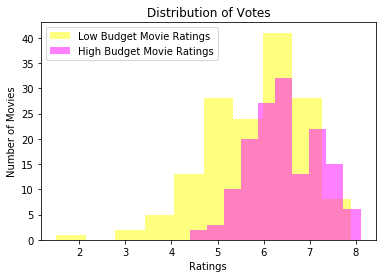

In [91]:
plt.hist(low_budget_ratings, alpha=0.5, label='Low Budget Movie Ratings',color='yellow')
plt.hist(high_budget_ratings, alpha=0.5, label='High Budget Movie Ratings',color='magenta')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')
plt.legend(loc='upper left')
plt.show()

On an average, high budget movies got better ratings. Although worst rating for low budget movies is less than 2 whereas worst ratings for high budget movies is approx 4.5 , still some low budget movies perform extremely well having ratings more than 6.

<a id='conclusions'></a>
## Conclusions

#### Most Popular Genre

Drama is the most popular genre followed by Comedy.

#### Ratings of Low & High Budget Movies

On average high budget movies got better ratings than the low budget movies.

## Limitations

There are quite limitations in the data which might affect the result such as the missing values and the 0 values in the budget & budget_adj columns whereas some columns are unbalanced which might affect our analysis.